# 계층적 군집분석
- 여러개의 군집 중에서 가장 유사도가 높은, 혹은 거리가 가까운 군집 두 개를 선택하여 하나로 합치면서 군집 개수를 줄여 가는 방법을 말한다. **합체 군집화(agglomerative clustering)**라고도 한다. 가장 처음에는 모든 군집이 하나의 데이터만을 가진다. 따라서 최초에는 데이터 개수만큼 군집이 존재하지만 군집을 합치면서 최종적으로 하나의 군집만 남게 된다.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [4]:
df = pd.read_csv('clustering/2022.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   소계               18 non-null     object 
 1   year             18 non-null     int64  
 2   silver_hall      18 non-null     int64  
 3   welfare_facil_w  18 non-null     float64
 4   popu65           18 non-null     object 
 5   jobforpay        18 non-null     int64  
 6   ratio_old        18 non-null     float64
 7   stress           18 non-null     float64
 8   melancholy       18 non-null     float64
 9   poor_60          18 non-null     float64
 10  infra            18 non-null     object 
dtypes: float64(5), int64(3), object(3)
memory usage: 1.7+ KB


In [5]:
df = df[['silver_hall', 'welfare_facil_w', 'jobforpay', 'ratio_old', 'stress', 'melancholy', 'poor_60', 'infra']]
df

,silver_hall,welfare_facil_w,jobforpay,ratio_old,stress,melancholy,poor_60,infra
0,18,0.874751,23823,18.2,19.6,5.6,30851.0,573
1,4,0.980119,10201,21.6,19.7,12.0,13210.5,194
2,7,0.974155,9844,23.7,4.4,7.1,12748.5,162
3,3,0.787276,25277,12.4,22.8,14.3,32733.5,592
4,2,0.970179,11961,30.7,14.3,11.6,15490.0,139
5,7,0.988072,11180,12.1,7.0,9.0,14477.5,247
6,8,0.880716,20070,15.0,5.0,8.8,25990.0,508
7,39,0.705765,61995,16.3,18.8,5.7,80283.0,"1,429"
8,0,1.000000,3893,38.2,14.9,8.9,5041.5,49
9,1,1.000000,6468,27.2,15.2,2.2,8375.5,73


In [6]:
df["infra"]=pd.to_numeric(df["infra"].str.replace(",",""))

In [8]:
# 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [10]:
df_pca = pca.fit_transform(df_std)
df_pca[:5]

array([[ 2.40114631, -0.0623077 ],
       [ 0.09843101,  2.00416235],
       [-0.54540576, -0.05494213],
       [ 3.00436357,  2.52968584],
       [-0.36114663,  1.32437587]])

In [11]:
pca.explained_variance_ratio_

array([0.6664236 , 0.17202122])

In [12]:
df2 = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df2.head()

,PC1,PC2
0,2.401146,-0.062308
1,0.098431,2.004162
2,-0.545406,-0.054942
3,3.004364,2.529686
4,-0.361147,1.324376


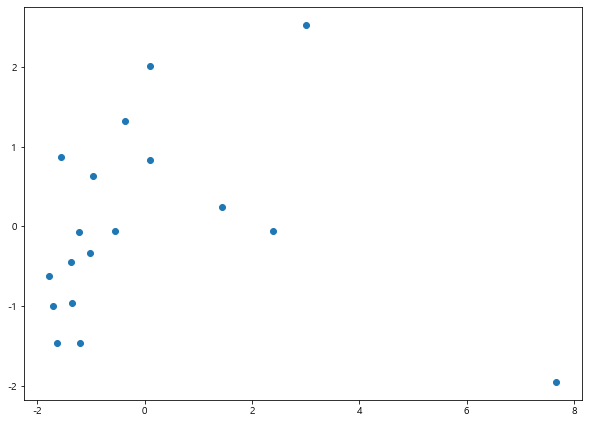

In [13]:
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(df2.iloc[:,0], df2.iloc[:,1])

plt.show()

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(df2, 'ward')
Z

array([[ 9.        , 16.        ,  0.33236417,  2.        ],
       [13.        , 17.        ,  0.35738895,  2.        ],
       [11.        , 18.        ,  0.4067581 ,  3.        ],
       [10.        , 12.        ,  0.42658917,  2.        ],
       [14.        , 19.        ,  0.49878934,  3.        ],
       [ 8.        , 15.        ,  0.62998421,  2.        ],
       [ 4.        ,  5.        ,  0.67763752,  2.        ],
       [ 2.        , 20.        ,  0.85339034,  4.        ],
       [21.        , 22.        ,  0.98531649,  5.        ],
       [ 0.        ,  6.        ,  1.01112637,  2.        ],
       [ 1.        , 24.        ,  1.1013333 ,  3.        ],
       [23.        , 25.        ,  1.63118376,  6.        ],
       [26.        , 29.        ,  2.96832842, 11.        ],
       [ 3.        , 27.        ,  3.08594162,  3.        ],
       [28.        , 31.        ,  4.12787617,  6.        ],
       [30.        , 32.        ,  8.06700553, 17.        ],
       [ 7.        , 33.

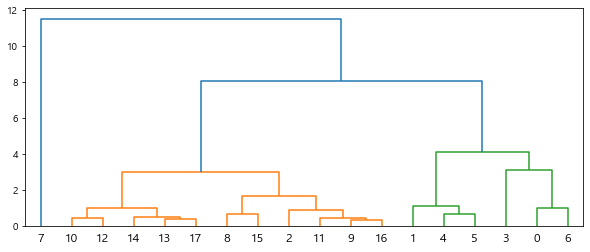

In [16]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

plt.figure(figsize=(10, 4))
ax = plt.subplot()

ddata = dendrogram(Z)

dcoord = np.array(ddata["dcoord"])
icoord = np.array(ddata["icoord"])
leaves = np.array(ddata["leaves"])
idx = np.argsort(dcoord[:, 2])
dcoord = dcoord[idx, :]
icoord = icoord[idx, :]
idx = np.argsort(Z[:, :2].ravel())
label_pos = icoord[:, 1:3].ravel()[idx][:20]

plt.show()

In [ ]:
# Cluster 1 : 10, 12, 14, 13, 17    => 창녕군, 남해군, 산청군, 하동군, 합천군
# Cluster 2 : 8, 15, 2, 11, 9, 16   => 의령군, 함양군, 사천시, 고성군, 함안군, 거창군
# Cluster 3 : 1, 4, 5, 3, 0, 6      => 통영시, 밀양시, 거제시, 김해시, 진주시, 양산시

In [ ]:
# Cluster 1 : 10, 12, 14, 13, 17,  8, 15, 2, 11, 9, 16    => 창녕군, 남해군, 산청군, 하동군, 합천군, 의령군, 함양군, 사천시, 고성군, 함안군, 거창군
# Cluster 2 : 1, 4, 5, 3, 0, 6      => 통영시, 밀양시, 거제시, 김해시, 진주시, 양산시
# Cluster 3 : 7     => 창원시